# **Edición Imágenes**

In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian-security bullseye-security InRelease
Hit:3 http://deb.debian.org/debian bullseye-updates InRelease




libgl1-mesa-glx is already the newest version (20.3.5-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
# Then import the required libraries
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

In [3]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2025-03-31T04:01:49.114032+00:00

Python implementation: CPython
Python version       : 3.10.15
IPython version      : 8.32.0

Compiler    : GCC 10.2.1 20210110
OS          : Linux
Release     : 6.1.128-136.201.amzn2023.x86_64
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit

deepnote_toolkit: 0.1.0
numpy           : 1.25.2
matplotlib      : 3.6.3
cv2             : 4.11.0



## Input

In [4]:
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/198023.jpg


--2025-03-31 04:01:49--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/198023.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39350 (38K) [image/jpeg]
Saving to: ‘198023.jpg.3’

198023.jpg.3        100%[===================>]  38.43K  --.-KB/s    in 0.06s   

2025-03-31 04:01:50 (610 KB/s) - ‘198023.jpg.3’ saved [39350/39350]



## Leer imagenes

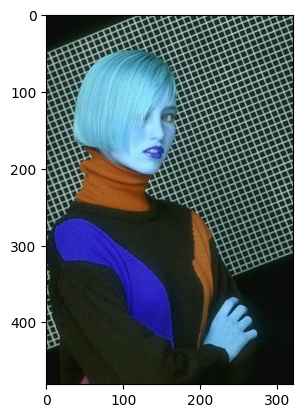

In [5]:
img = imread('198023.jpg')
plt.imshow(img)
plt.show()

## Funcion

In [6]:
def data_img(img):
  print('Tamaño = ',img.shape)
  print('Max = ',np.max(img))
  print('Min = ',np.min(img))

data_img(img)

Tamaño =  (481, 321, 3)
Max =  255
Min =  0


## Recortar

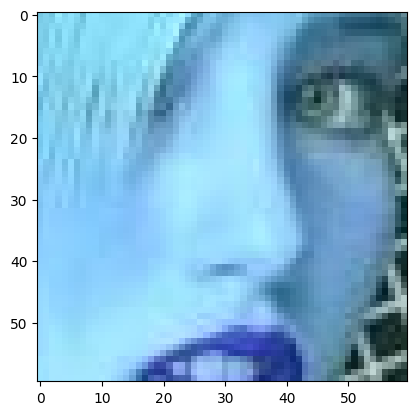

In [7]:
# Primero alto, después ancho
img_cropped = img[120:180, 110:170]
plt.imshow(img_cropped)

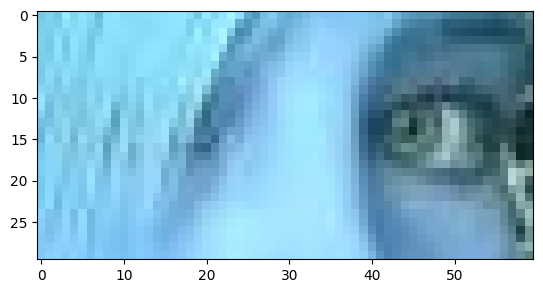

In [8]:
# Primero alto, después ancho
img_cropped = img[120:150, 110:170]
plt.imshow(img_cropped)

In [9]:
RGB = (0, 0, 0) #negro ausencia de color
RGB = (255, 255, 255) #blanco
M = (0) #monocromo

## Selección del primer canal de color

In [10]:
X = img_cropped[:,:,0]
data_img(X)

Tamaño =  (30, 60)
Max =  185
Min =  10


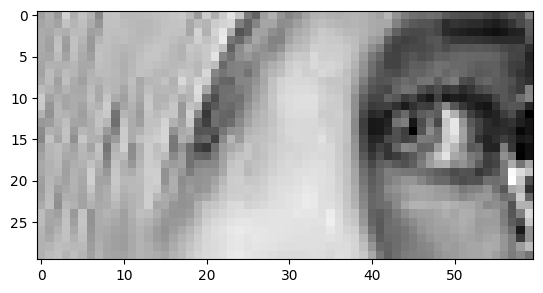

In [11]:
plt.imshow(X,cmap='gray')
plt.show()

In [12]:
data_img(img_cropped)

Tamaño =  (30, 60, 3)
Max =  255
Min =  10


In [13]:
img = img_cropped[0:0]
img

array([], shape=(0, 60, 3), dtype=uint8)

In [14]:
img_cropped[0,0]

array([119, 200, 227], dtype=uint8)

In [15]:
pixel = img_cropped[15:16,46:47]
pixel

array([[[ 95, 130, 126]]], dtype=uint8)

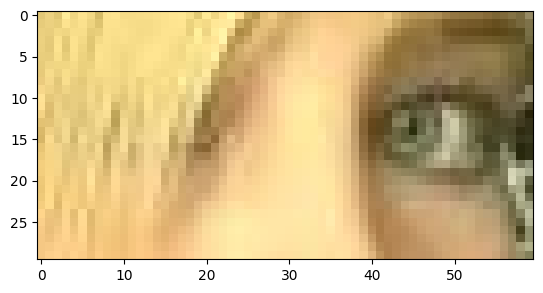

In [16]:
img_cropped_rgb = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB)
plt.imshow(img_cropped_rgb)

## Me da informacion del color (ojo es BGR)

In [17]:
img_cropped[0:0]

array([], shape=(0, 60, 3), dtype=uint8)

In [18]:
pixel1 = (15,44,3)

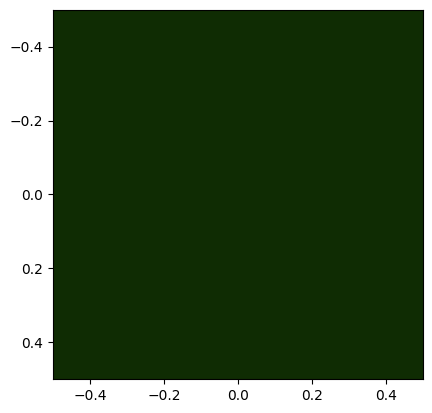

In [19]:
plt.imshow([[pixel1]])

## Inversion de color a RGB

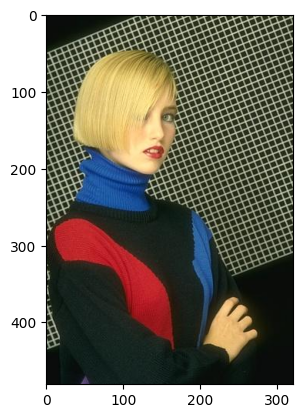

In [20]:
img = imread('198023.jpg')  # Read the image again since 'img' was empty
img_BGR = img[:,:,::-1]  # Now convert RGB to BGR
plt.imshow(img_BGR)
plt.show()

## Deteccion de bordes

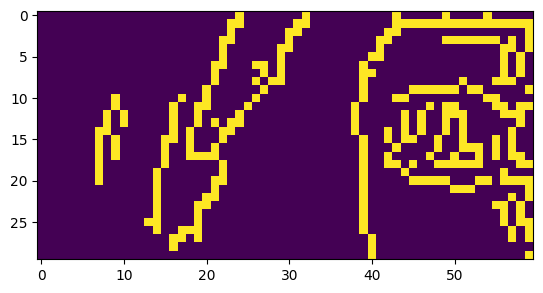

In [21]:
img_canny = cv2.Canny(img_cropped,100,200)
plt.imshow(img_canny)

## Levantar otra vez la imagen elegida

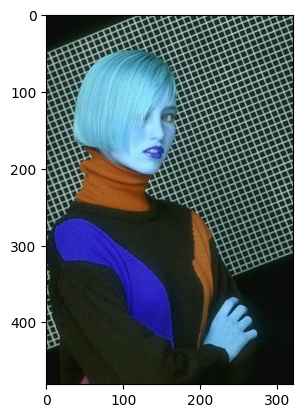

In [22]:
img = imread('198023.jpg')
plt.imshow(img)
plt.show()

## Cambio de color a RGB

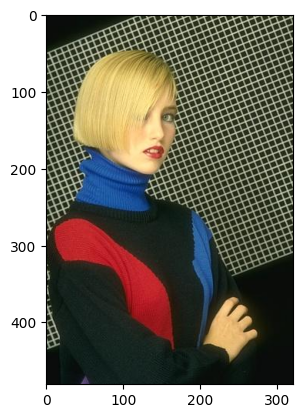

In [23]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## Deteccion de borde

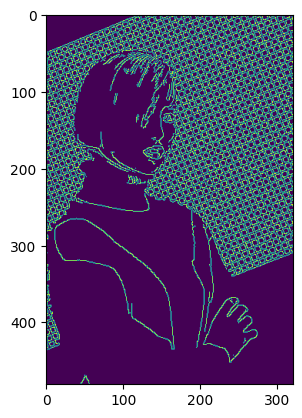

In [24]:
img_canny = cv2.Canny(img,100,200)
plt.imshow(img_canny)

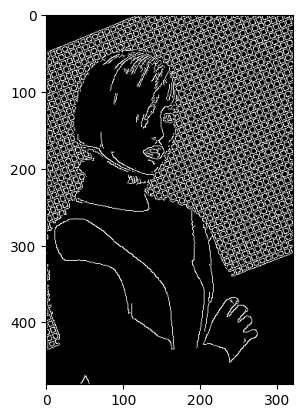

In [25]:
plt.imshow(img_canny,cmap='gray')
plt.show()

## Escala de Grises

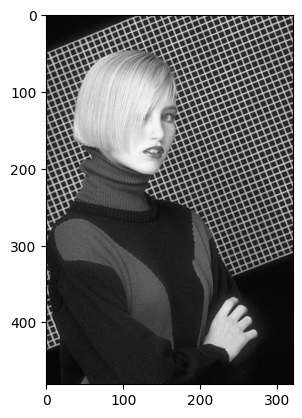

In [26]:
# Assuming 'img' is your original image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Now 'img_gray' holds the monochrome version of your image
plt.imshow(img_gray, cmap='gray')
plt.show()

## Alteración color y borde

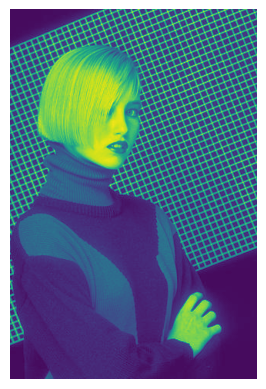

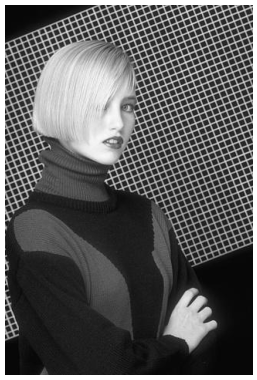

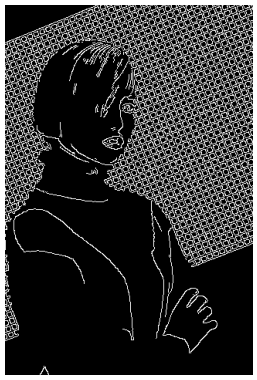

In [27]:
from pathlib import WindowsPath
import cv2
import matplotlib.pyplot as plt

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Correct way to call cvtColor
plt.imshow(img_gray) # Display the grayscale image
plt.axis('off')  # Turn off axis labels

# Get image dimensions first
height, width = img_gray.shape
plt.figure(figsize=(width/50, height/50), dpi=50)  # Now width and height are defined
plt.imshow(img_gray, cmap='gray')    # Display in grayscale again
plt.axis('off')  # Turn off axis labels
plt.show()    # Show the plot

bordes = cv2.Canny(img_gray,100,200)
plt.figure(figsize=(width/50, height/50),dpi=50)
plt.imshow(bordes,cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

## BGR vs RGB

(-0.5, 320.5, 480.5, -0.5)

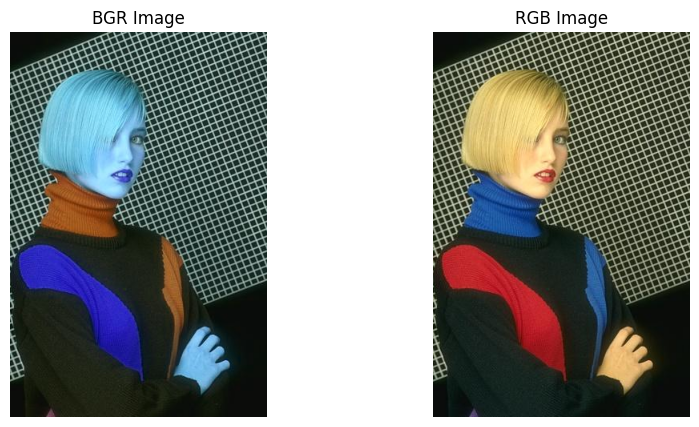

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # Adjust figsize as needed


# Display grayscale image in the first subplot
img = imread('198023.jpg')
plt.imshow(img)
axes[0].imshow(img)
axes[0].set_title('BGR Image') # Add a title
axes[0].axis('off') # Turn off axis labels


# Display edges image in the second subplot
img_bgr = cv2.Canny(img, 100, 200)
plt.imshow(img_rgb)
axes[1].imshow(img_rgb)
axes[1].set_title('RGB Image') # Add a title
axes[1].axis('off') # Turn off axis labels

## Alteración Gris en imagen y en borde

(-0.5, 320.5, 480.5, -0.5)

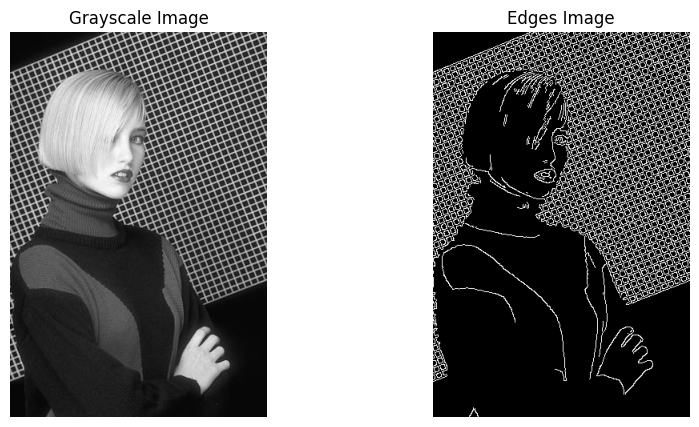

In [29]:
from pathlib import WindowsPath
import cv2
import matplotlib.pyplot as plt

# Create a figure with 2 subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # Adjust figsize as needed

# Display grayscale image in the first subplot
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Grayscale Image') # Add a title
axes[0].axis('off') # Turn off axis labels

# Display edges image in the second subplot
bordes = cv2.Canny(img_gray, 100, 200)
axes[1].imshow(bordes, cmap='gray')
axes[1].set_title('Edges Image') # Add a title
axes[1].axis('off') # Turn off axis labels



## Alteración Color en imagen y en borde

(-0.5, 320.5, 480.5, -0.5)

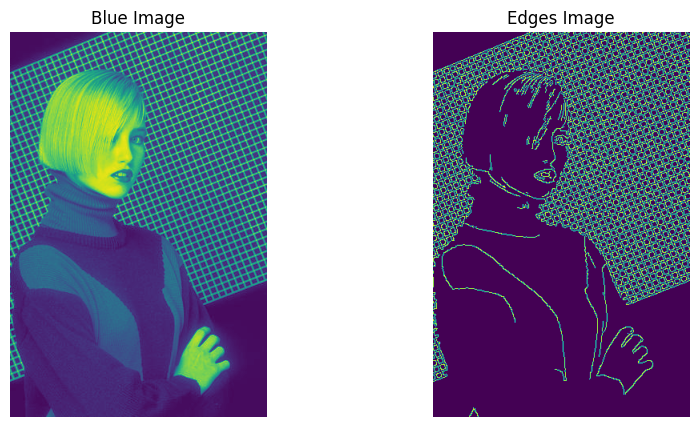

In [30]:
# Create a figure with 2 subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # Adjust figsize as needed

# Display grayscale image in the first subplot
img_blue = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
axes[0].imshow(img_blue)
axes[0].set_title('Blue Image') # Add a title
axes[0].axis('off') # Turn off axis labels

# Display edges image in the second subplot
img_bgr = cv2.Canny(img_gray, 100, 200)
axes[1].imshow(img_bgr)
axes[1].set_title('Edges Image') # Add a title
axes[1].axis('off') # Turn off axis labels


## Imagen gris con alteración de colores

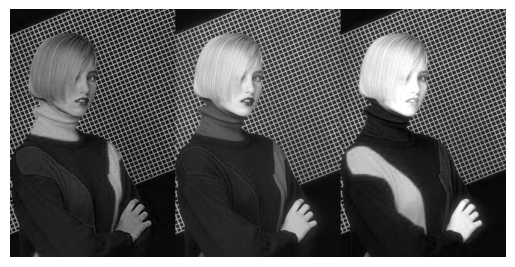

In [31]:
img_R=img[:,:,0]
img_G=img[:,:,1]
img_B=img[:,:,2]

plt.imshow(np.hstack([img_R,img_G,img_B]),cmap='gray')

plt.axis('off')
plt.show()

## Imagen original con alteración de color Gris/ RGB / BGR

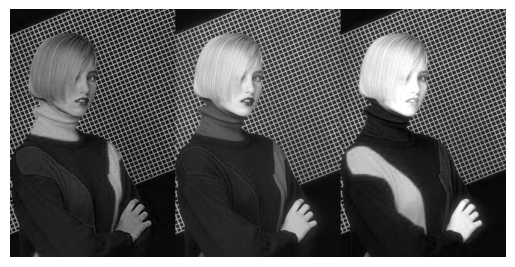

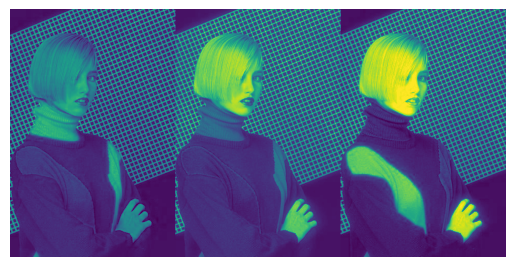

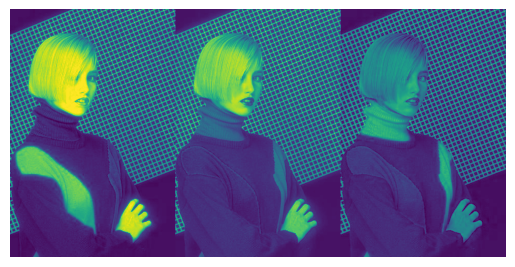

In [32]:
img_R=img[:,:,0]
img_G=img[:,:,1]
img_B=img[:,:,2]

plt.imshow(np.hstack([img_R,img_G,img_B]),cmap='gray')

plt.axis('off')
plt.show()


img_R=img[:,:,0]
img_G=img[:,:,1]
img_B=img[:,:,2]

plt.imshow(np.hstack([img_R,img_G,img_B]))

plt.axis('off')
plt.show()

img_B=img[:,:,0]
img_G=img[:,:,1]
img_R=img[:,:,2]

plt.imshow(np.hstack([img_R, img_G,img_B]))

plt.axis('off')
plt.show()

## Blurred en BGR vs RGB

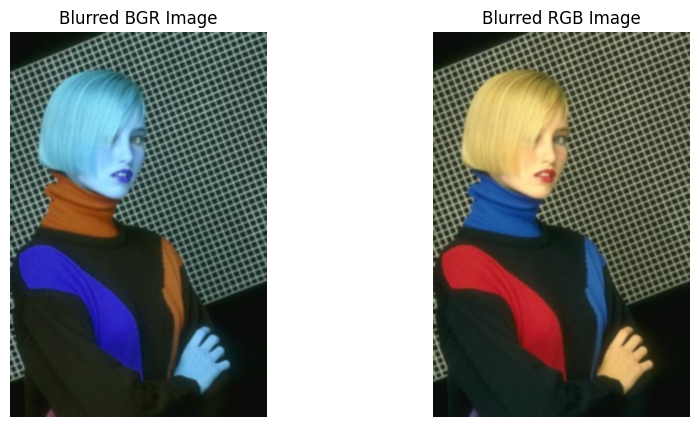

In [33]:
# Create a figure with 2 subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# First subplot: Original blurred image
img_blur = cv2.GaussianBlur(img, (5, 5), 0)
axes[0].imshow(img_blur)
axes[0].set_title('Blurred BGR Image')
axes[0].axis('off')

# Second subplot: RGB blurred image
img_blur_2 = cv2.GaussianBlur(img_rgb, (5, 5), 0)
axes[1].imshow(img_blur_2)  # Fixed typo: img_blur_ to img_blur_2
axes[1].set_title('Blurred RGB Image')
axes[1].axis('off')

plt.show()

## Blured en 7 - 7 

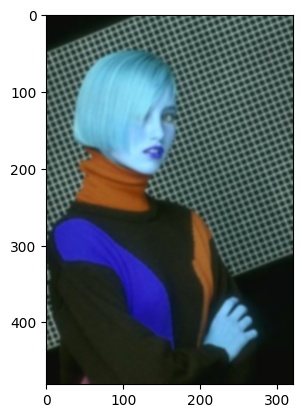

In [34]:
img_blured = cv2.GaussianBlur(img, (7, 7), 0)
plt.imshow(img_blured)
axes[1].axis('off')
axes[1].imshow(img_blured)
axes[1].set_title('Blur Image') # Add a title
plt.show()


## Blured en 31 - 31

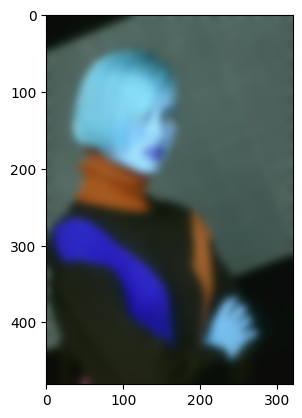

In [35]:
img_blured = cv2.GaussianBlur(img, (31, 31), 0)
plt.imshow(img_blured)
plt.show()

## Blured en 3 - 151

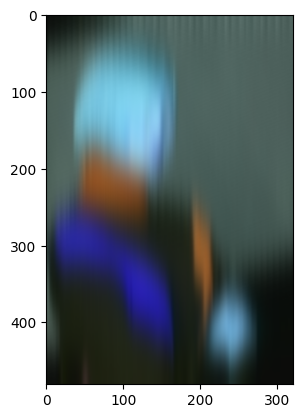

In [36]:
img_blured = cv2.GaussianBlur(img, (3, 151), 0)
plt.imshow(img_blured)
plt.show()

## Blured en 151-3

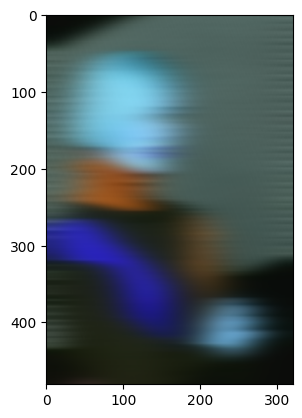

In [37]:
img_blured = cv2.GaussianBlur(img, (151, 3), 0)
plt.imshow(img_blured)
plt.show()

## Blured en 151 - 151 

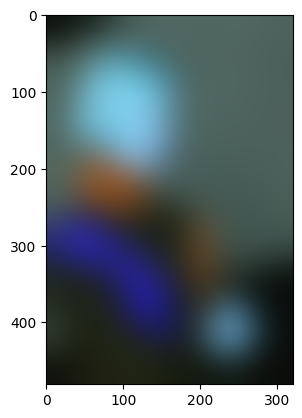

In [38]:
img_blured = cv2.GaussianBlur(img, (151, 151), 0)
plt.imshow(img_blured)
plt.show()

## Blured en 1 - 131 y 350

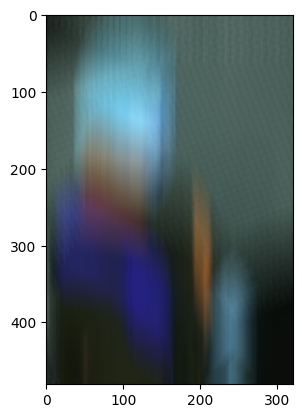

In [39]:
img_blured = cv2.GaussianBlur(img, (1, 131), 300) # alteré el último valor
plt.imshow(img_blured)
plt.show()

## Ampliación Blured en 1 - 131 y 350

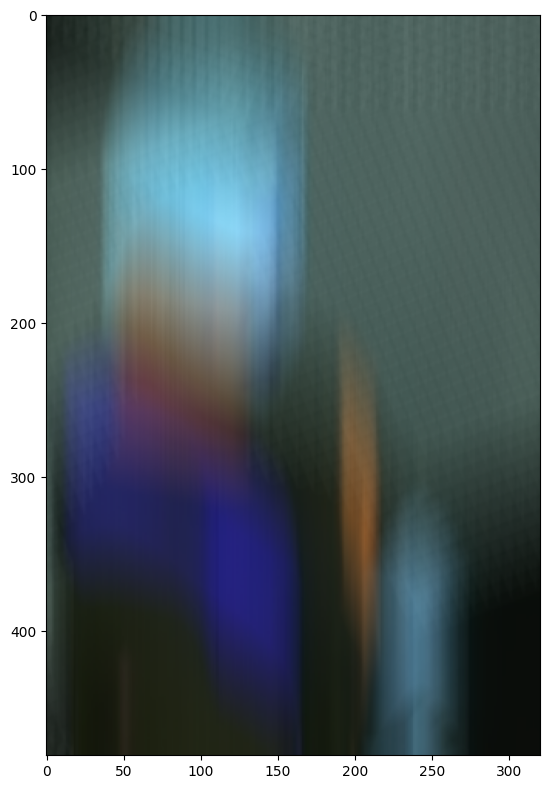

In [40]:
# Get image dimensions first
height, width = img.shape[:2]  # Get height and width from image shape

# Now create the figure with calculated dimensions
plt.figure(figsize=(width/50, height/50), dpi=100) #aumenté el tamaño para ver mejor el patrón
img_blured = cv2.GaussianBlur(img, (1, 131), 350)
plt.imshow(img_blured)
plt.show()

## Contraste de variaciones aplicadas

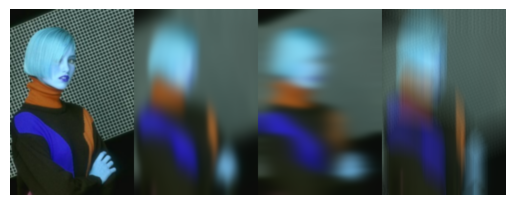

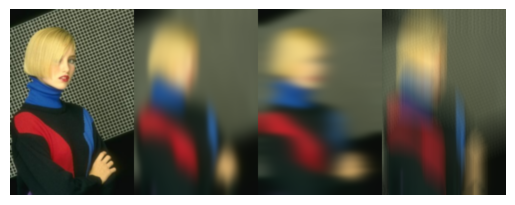

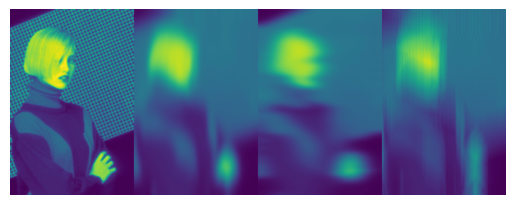

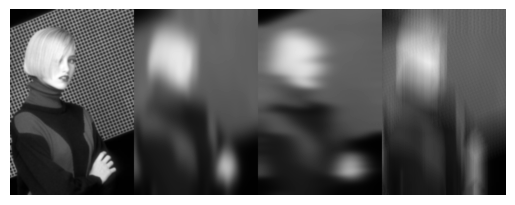

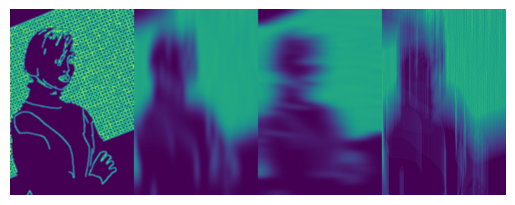

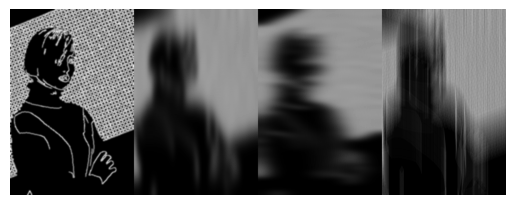

In [41]:
img_U = cv2.GaussianBlur(img, (7, 7), 0)
img_V = cv2.GaussianBlur(img, (31, 151), 0)
img_W = cv2.GaussianBlur(img, (151, 31), 0)
img_Y = cv2.GaussianBlur(img, (1, 131), 300) # Changed Img_Y to img_Y

plt.imshow(np.hstack([img_U, img_V, img_W, img_Y]))

plt.axis('off')
plt.show()


img_U = cv2.GaussianBlur(img_rgb, (7, 7), 0)
img_V = cv2.GaussianBlur(img_rgb, (31, 151), 0)
img_W = cv2.GaussianBlur(img_rgb, (151, 31), 0)
img_Y = cv2.GaussianBlur(img_rgb, (1, 131), 300) # Changed Img_Y to img_Y

plt.imshow(np.hstack([img_U, img_V, img_W, img_Y]))

plt.axis('off')
plt.show()


img_U = cv2.GaussianBlur(img_blue, (7, 7), 0)
img_V = cv2.GaussianBlur(img_blue, (31, 151), 0)
img_W = cv2.GaussianBlur(img_blue, (151, 31), 0)
img_Y = cv2.GaussianBlur(img_blue, (1, 131), 300) # Changed Img_Y to img_Y

plt.imshow(np.hstack([img_U, img_V, img_W, img_Y]))

plt.axis('off')
plt.show()


img_U = cv2.GaussianBlur(img_blue, (7, 7), 0)
img_V = cv2.GaussianBlur(img_blue, (31, 151), 0)
img_W = cv2.GaussianBlur(img_blue, (151, 31), 0)
img_Y = cv2.GaussianBlur(img_blue, (1, 131), 300) # Changed Img_Y to img_Y

plt.imshow(np.hstack([img_U, img_V, img_W, img_Y]), cmap='gray')

plt.axis('off')
plt.show()



img_U = cv2.GaussianBlur(img_bgr, (7, 7), 0)
img_V = cv2.GaussianBlur(img_bgr, (31, 151), 0)
img_W = cv2.GaussianBlur(img_bgr, (151, 31), 0)
img_Y = cv2.GaussianBlur(img_bgr, (1, 131), 300) # Changed Img_Y to img_Y

plt.imshow(np.hstack([img_U, img_V, img_W, img_Y]))

plt.axis('off')
plt.show()



img_U = cv2.GaussianBlur(img_bgr, (7, 7), 0)
img_V = cv2.GaussianBlur(img_bgr, (31, 151), 0)
img_W = cv2.GaussianBlur(img_bgr, (151, 31), 0)
img_Y = cv2.GaussianBlur(img_bgr, (1, 131), 300) # Changed Img_Y to img_Y

plt.imshow(np.hstack([img_U, img_V, img_W, img_Y]), cmap='gray')

plt.axis('off')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>